## Data Project- Stock Market Analysis

Analysis queries:
    1. What is the change in price of stock overtime?
    2. What was the daily return of stock on average?
    3. What was the moving average of the various stock?
    4. What was the correlation between different stocks' closing prices?
    5. What was the correlation between different stocks' daily return?
    6. How much value do we put in risk by investing in a particular stock?
    7. How can we attempt to predict future stock behavior?

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import data
from datetime import datetime

In [3]:
# List of the tech stocks used in this project.
#AAPL- Apple, GOOG- Google, MSFT- Microsoft, AMZN- Amazon
tech_list= ['AAPL','GOOG','MSFT','AMZN']

In [4]:
#end and start time for datagraph
end= datetime.now()
start= datetime(end.year-1,end.month,end.day-1)

In [5]:
#for loop for grabbing finance data and setting it as a dataframe. 
#globals()- taking the string 'stock' and makes it a global variable(Setting the string name as data variable)
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [6]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-02,80.860001,79.732498,80.187500,80.834999,87642800.0,80.293968
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.735992
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,80.040680
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,82.320328
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.807037
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


In [7]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-02,1439.609985,1418.829956,1430.550049,1439.219971,1278100,1439.219971
2020-06-03,1446.552002,1429.776978,1438.300049,1436.380005,1256200,1436.380005
2020-06-04,1438.959961,1404.729980,1430.400024,1412.180054,1484300,1412.180054
2020-06-05,1445.050049,1406.000000,1413.170044,1438.390015,1734900,1438.390015
2020-06-08,1447.989990,1422.339966,1422.339966,1446.609985,1404200,1446.609985
...,...,...,...,...,...,...
2021-05-28,2428.139893,2407.689941,2421.959961,2411.560059,1205400,2411.560059
2021-06-01,2437.970947,2404.879883,2422.000000,2429.810059,958300,2429.810059
2021-06-02,2442.000000,2404.199951,2435.310059,2421.280029,857900,2421.280029


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,119.683559,116.623951,118.265069,118.173975,1.256169e+08,117.765753
std,14.525905,14.259701,14.521526,14.349586,5.367710e+07,14.462505
min,80.860001,79.732498,80.187500,80.580002,2.518569e+07,80.040680
25%,115.314999,111.570000,113.850002,113.014999,8.874790e+07,112.460999
50%,123.180000,119.650002,121.279999,121.190002,1.119123e+08,120.884666
75%,129.705002,126.730000,128.455002,127.889999,1.515246e+08,127.658161
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2020-06-02 to 2021-06-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    float64
 5   Adj Close  255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


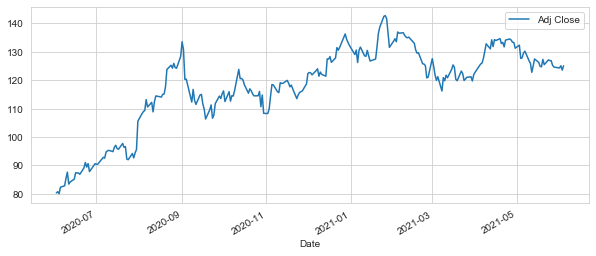

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

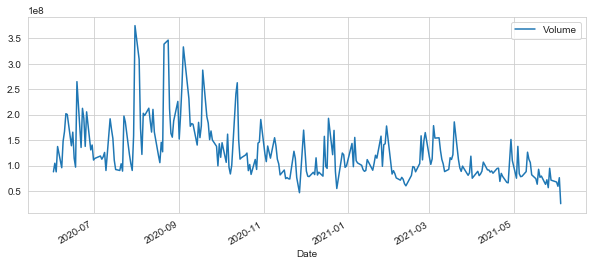

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

    Moving average: average price of trading instrument over selected time frame
    Example: Let us calculate simple moving average of x days. MA= (sum of price of past x days)/x

In [57]:
#calculating moving average for stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name= 'MA for %s days'%(str(ma))
    AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()
    GOOG[column_name]= GOOG['Adj Close'].rolling(ma).mean()
    MSFT[column_name]= MSFT['Adj Close'].rolling(ma).mean()
    AMZN[column_name]= AMZN['Adj Close'].rolling(ma).mean()

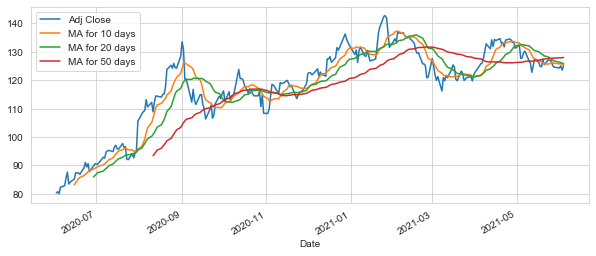

In [13]:
#plotting all additional moving averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

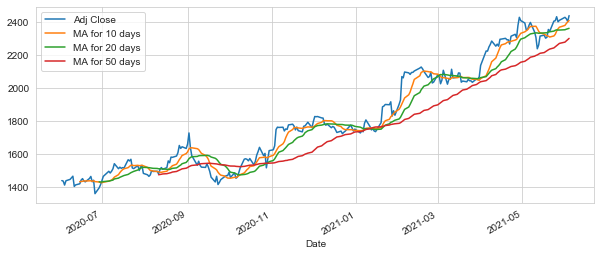

In [58]:
#plotting all additional moving averages
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

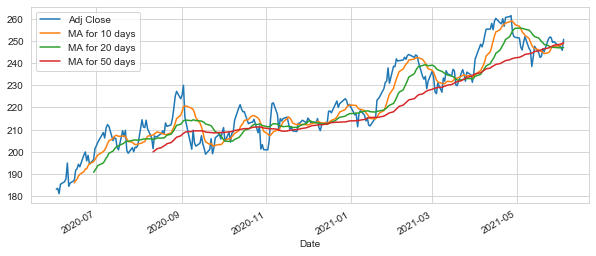

In [59]:
#plotting all additional moving averages
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

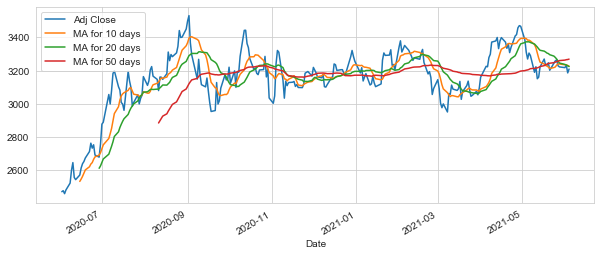

In [60]:
#plotting all additional moving averages
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

    Conclusion: If we take moving average for a longer period of time, we are gonna get a much smoother curve.
    Moreover the moving average will be much less dependent on daily flutucations, for its general trend.

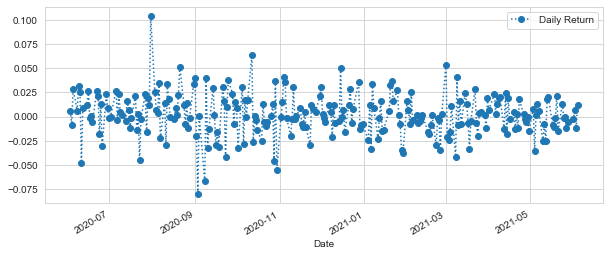

In [14]:
#daily returns and risk of socks. Daily return column= percent change in the adjusted price column
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='dotted',marker='o')

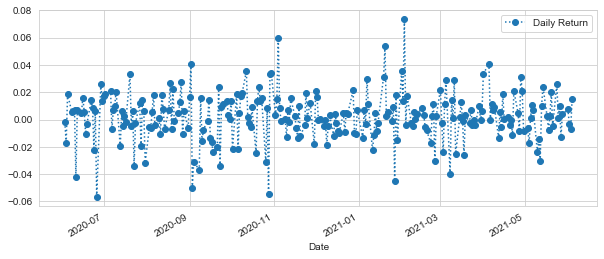

In [61]:
#daily returns and risk of socks. Daily return column= percent change in the adjusted price column
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='dotted',marker='o')

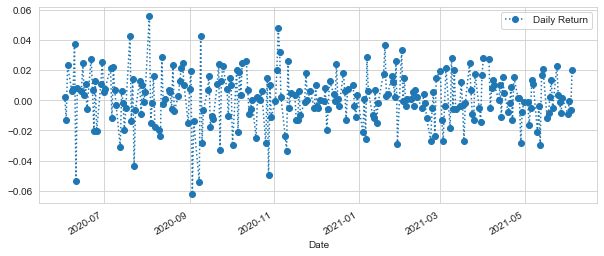

In [62]:
#daily returns and risk of socks. Daily return column= percent change in the adjusted price column
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
MSFT['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='dotted',marker='o')

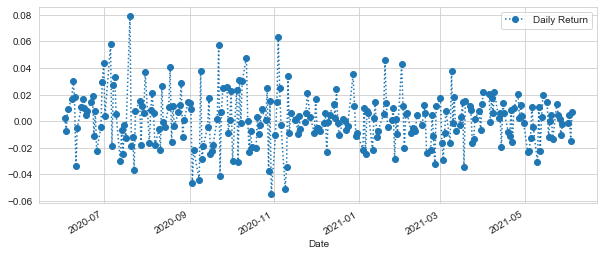

In [63]:
#daily returns and risk of socks. Daily return column= percent change in the adjusted price column
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='dotted',marker='o')

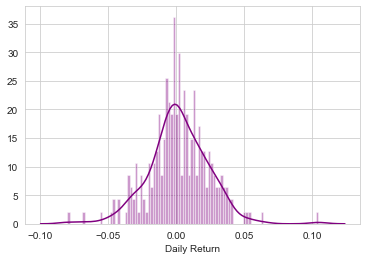

In [16]:
#plotting a histogram for daily returns of apple for past year
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

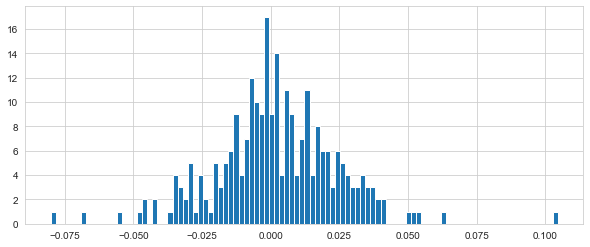

In [19]:
AAPL['Daily Return'].hist(bins=100,figsize=(10,4))

In [22]:
#analyzing the returns of all the stocks on our list, specifying only adj close price
closing_df= data.DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-02,80.293968,1439.219971,183.136765,2472.409912
2020-06-03,80.735992,1436.380005,183.582458,2478.399902
2020-06-04,80.040680,1412.180054,181.165863,2460.600098
2020-06-05,82.320328,1438.390015,185.404800,2483.000000
2020-06-08,82.807037,1446.609985,186.553680,2524.060059


## analyzing the correlation between daily returns of stocks

In [23]:
#analyzing the daily returns of stocks
#creating a new dataframe'tech_rets' that contains the percent change of 'Adj Close' values
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-02,NaN,NaN,NaN,NaN
2020-06-03,0.005505,-0.001973,0.002434,0.002423
2020-06-04,-0.008612,-0.016848,-0.013164,-0.007182
2020-06-05,0.028481,0.018560,0.023398,0.009103
2020-06-08,0.005912,0.005715,0.006197,0.016536


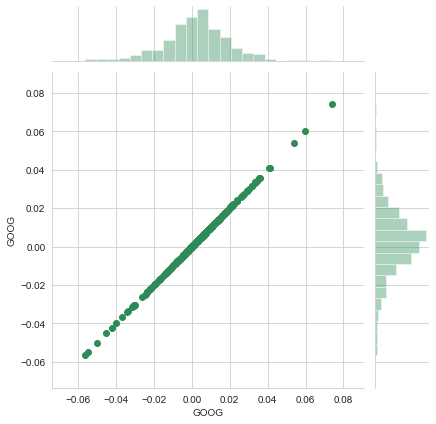

In [30]:
#comparing the daily return of two same stocks
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')


Conclusion: The two stocks are same and hence are perfectly (and positively) correlated with each other and a linear relationship between its daily return values should occur. 

C:\Users\ANJALI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


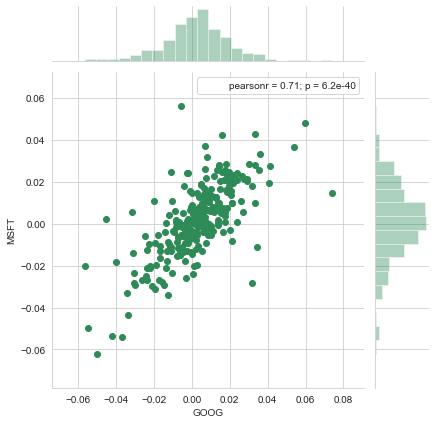

In [32]:
#comparing the daily return of two different stocks
from scipy.stats import pearsonr
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen',stat_func=pearsonr)


Conclusion: The pearsonr value=0.71 in this case. A value of 1 means perfectly positive correlation and as it goes down the value the values become less correlated.

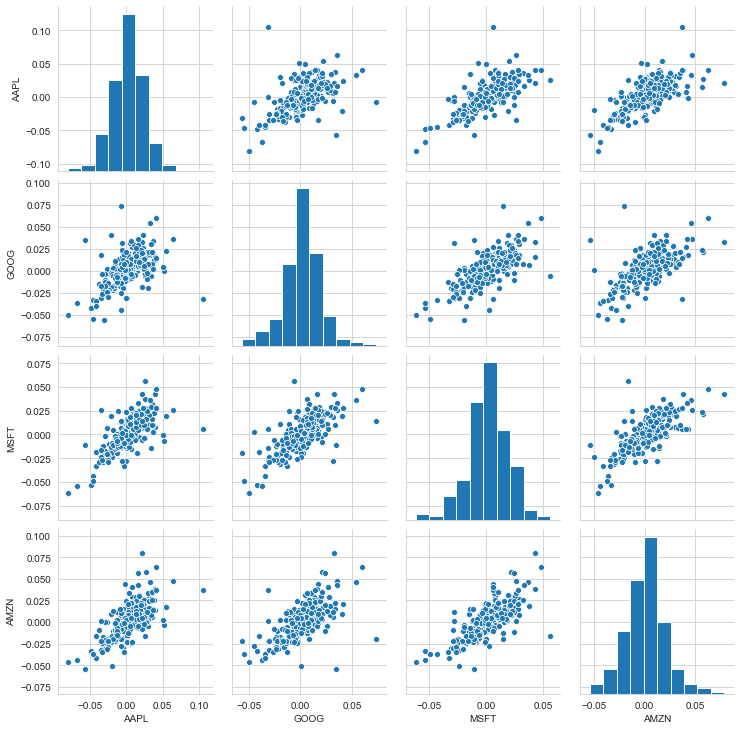

In [35]:
sns.pairplot(tech_rets.dropna())

Conclusion: On the diagonals we have histograms representing the daily returns of every stock. On the upper and lower triagles , we have the correlation scatterplots. We can get a visual representation of which stocks were correlated and which weren't.

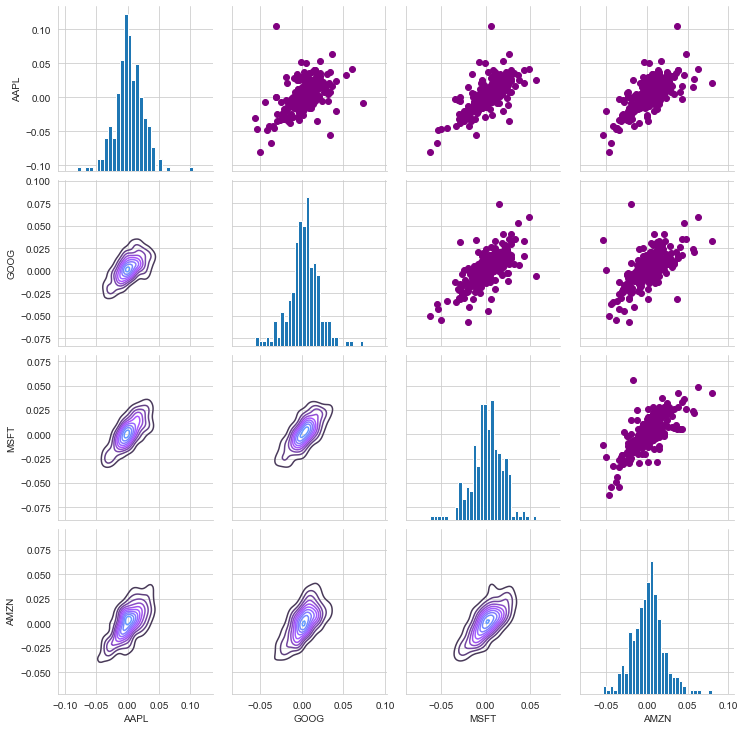

In [40]:
#to get a little more control over the plots(defining which kind of plot goes on diagonal,upper and lower triangle)
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Conclusion: On the upper triangle we have our scatterplots. On the lower triangle we have the seaborn kdeplot. For the diagonals, we called the histograms with 30 bins.

## correlation between the closing prices of the stocks

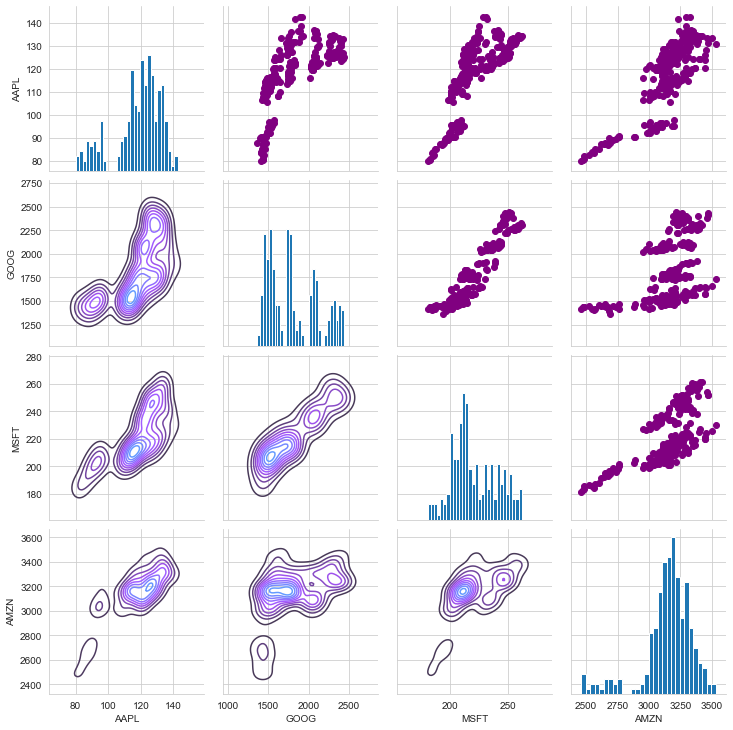

In [41]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

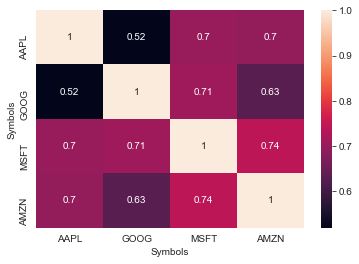

In [44]:
#individually checking up the correlation between two stocks
corr = tech_rets.corr()
sns.heatmap(corr,annot=True)

Conclusion: MSFT and AMZN have the most correlated daily returns.

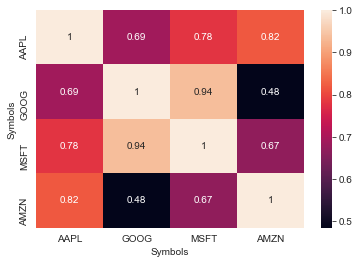

In [53]:
corr = closing_df.corr()
sns.heatmap(corr,annot=True)

Conclusion: GOOG and MSFT have the most correlated daily closings.



## How much value do we put in risk by investing in a particular stock?

Here we are going to use one of the most basic ways of calculating risk that is by comparing the expected return with the standard deviation of the daily returns.

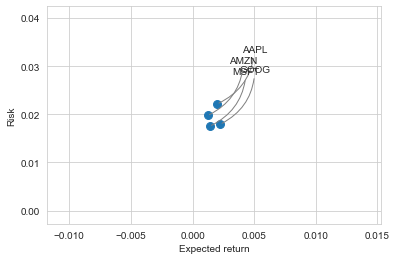

In [119]:
rets = tech_rets.dropna()

#defining are of the tiny dots on scatterplot
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')


#labelling the scatter plots using annotations. zip allows to call rets.columns, rets.mean(), rets.std() at once
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color='0.5', connectionstyle = 'arc3,rad=-0.3'))
    


Conclusion: One would like to purchase a stock which has low risk factor and a high expected return. Looking at the graph above, GOOG stocks seems to be the most appropriate one . 

## Value at risk

Value at risk means the amount of money one is putting at risk or can be lost for a given interval. There are various methods for calculating this but we are going to do it by the bootstrap and the Monte Carlo method.

# Bootstrap method

For this, one has to calculate the empirical quantiles from daily return histogram. An empirical quantile is is the number $ x_p$ such that a proportion $ p$ of the values are less than or equal to $ x_p$

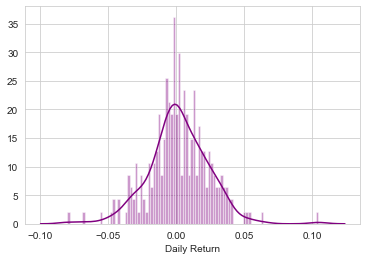

In [55]:
#For AAPl
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
rets['AAPL'].quantile(0.05)

-0.0337467928833314

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%

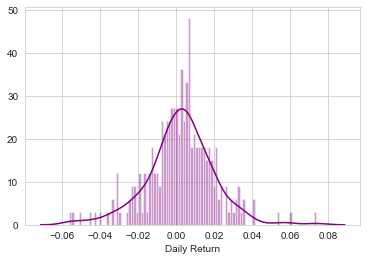

In [64]:
#For GOOG
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')

In [65]:
rets['GOOG'].quantile(0.05)

-0.030276944343769943

The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, our worst daily loss will not exceed 3.0%

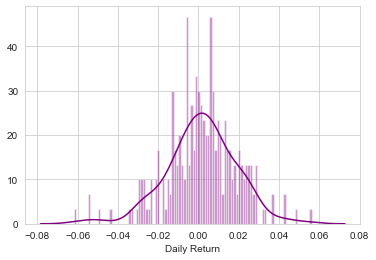

In [66]:
#For MSFT
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='purple')

In [67]:
rets['MSFT'].quantile(0.05)

-0.028111972748123958

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%



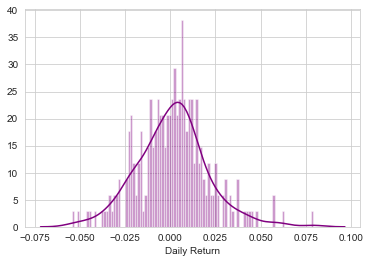

In [68]:
#For AMZN
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='purple')

In [69]:
rets['AMZN'].quantile(0.05)

-0.03025219721066707

The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, our worst daily loss will not exceed 3.0%

# Monte Carlo Method 

In [70]:
days= 365

dt=1/days
# mu is associated with the drift of the stock
mu = rets.mean()['AAPL']
# sigma = volatility of the stock
sigma = rets.std()['AAPL']

In [82]:
# creating a function that takes the starting price and number of days, and uses sigma and mu we already calculated form out daily returns
def stock_monte_carlo(start_price,days,mu,sigma):
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

## APPLE STOCK

In [79]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-06-02,80.860001,79.732498,80.187500,80.834999,87642800.0,80.293968,NaN,NaN,NaN,NaN
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.735992,NaN,NaN,NaN,0.005505
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,80.040680,NaN,NaN,NaN,-0.008612
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,82.320328,NaN,NaN,NaN,0.028481
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.807037,NaN,NaN,NaN,0.005912


Text(0.5, 1.0, 'MONTE CARLO ANALYSIS FOR APPLE')

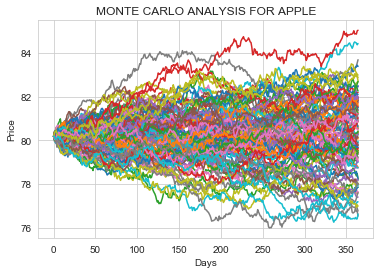

In [84]:
start_price = 80.187500

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MONTE CARLO ANALYSIS FOR APPLE')

In [91]:
#creating histograms for these end results
runs=1000
simulation=np.zeros(runs)
#down below we are creating an array and storing all the ending price points we obtained in the above graph
for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]


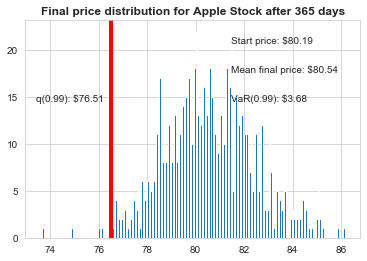

In [95]:
#99% of the values should fit within our output
q= np.percentile(simulation,1)

#plotting histograms
plt.hist(simulation,bins=200)

#adding text for starting price
plt.figtext(0.6,0.8 ,s="Start price: $%.2f" %start_price)

#adding text for mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

##adding text for variance of the prices(within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

##adding text for displaying 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#plotting a red line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

Conclusion: The start price was near 80.19 and the mean final price is 80.54. Hence, the stock appears to be pretty stable.
For the Value at Risk for the Apple stock, which looks to be $3.68 for every investment of 80.19 (the price of one inital Apple stock). The amount of money that one would loose at 99 percent of times, according to the Monte Carlo method, would be around 3.68 .

## GOOGLE STOCK

In [96]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-06-02,1439.609985,1418.829956,1430.550049,1439.219971,1278100,1439.219971,NaN,NaN,NaN,NaN
2020-06-03,1446.552002,1429.776978,1438.300049,1436.380005,1256200,1436.380005,NaN,NaN,NaN,-0.001973
2020-06-04,1438.959961,1404.729980,1430.400024,1412.180054,1484300,1412.180054,NaN,NaN,NaN,-0.016848
2020-06-05,1445.050049,1406.000000,1413.170044,1438.390015,1734900,1438.390015,NaN,NaN,NaN,0.018560
2020-06-08,1447.989990,1422.339966,1422.339966,1446.609985,1404200,1446.609985,NaN,NaN,NaN,0.005715


Text(0.5, 1.0, 'MONTE CARLO ANALYSIS FOR GOOGLE')

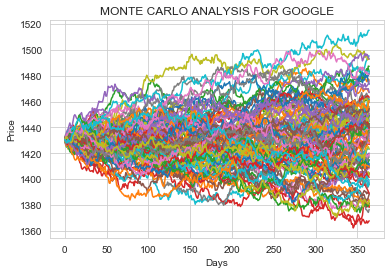

In [101]:
start_price = 1430.550049

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MONTE CARLO ANALYSIS FOR GOOGLE')

In [98]:
#creating histograms for these end results
runs=1000
simulation=np.zeros(runs)
#down below we are creating an array and storing all the ending price points we obtained in the above graph
for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]


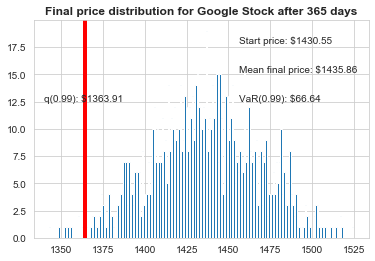

In [99]:
#99% of the values should fit within our output
q= np.percentile(simulation,1)

#plotting histograms
plt.hist(simulation,bins=200)

#adding text for starting price
plt.figtext(0.6,0.8 ,s="Start price: $%.2f" %start_price)

#adding text for mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

##adding text for variance of the prices(within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

##adding text for displaying 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#plotting a red line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Conclusion: The start price was near 1430.55 and the mean final price is 1435.86. For the Value at Risk for the Google stock, which looks to be 66.64 for every investment of 1430.55 (the price of one inital Google stock). The amount of money that one would loose at 99 percent of times, according to the Monte Carlo method, would be around 66.64 .

## MICROSOFT STOCK

In [102]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-06-02,185.000000,181.350006,184.250000,184.910004,30794600.0,183.136765,NaN,NaN,NaN,NaN
2020-06-03,185.940002,183.580002,184.820007,185.360001,27311000.0,183.582458,NaN,NaN,NaN,0.002434
2020-06-04,185.839996,182.300003,184.300003,182.919998,28761800.0,181.165863,NaN,NaN,NaN,-0.013164
2020-06-05,187.729996,182.009995,182.619995,187.199997,39893600.0,185.404800,NaN,NaN,NaN,0.023398
2020-06-08,188.550003,184.440002,185.940002,188.360001,33211600.0,186.553680,NaN,NaN,NaN,0.006197


Text(0.5, 1.0, 'MONTE CARLO ANALYSIS FOR MICROSOFT')

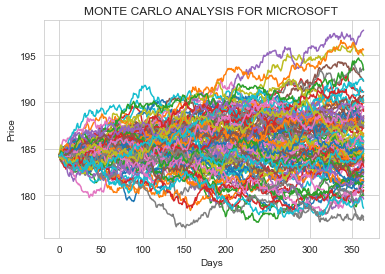

In [103]:
start_price = 184.250000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MONTE CARLO ANALYSIS FOR MICROSOFT')

In [104]:
#creating histograms for these end results
runs=1000
simulation=np.zeros(runs)
#down below we are creating an array and storing all the ending price points we obtained in the above graph
for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]


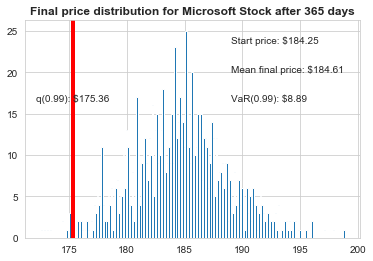

In [105]:
#99% of the values should fit within our output
q= np.percentile(simulation,1)

#plotting histograms
plt.hist(simulation,bins=200)

#adding text for starting price
plt.figtext(0.6,0.8 ,s="Start price: $%.2f" %start_price)

#adding text for mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

##adding text for variance of the prices(within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

##adding text for displaying 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#plotting a red line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

Conclusion: The start price was near 184.25 and the mean final price is 184.61. Hence, the stock appears to be pretty stable. For the Value at Risk for the Apple stock, which looks to be 8.89 for every investment of 184.25(the price of one inital Microsoft stock). The amount of money that one would loose at 99 percent of times, according to the Monte Carlo method, would be around 8.89 .

## AMAZON STOCK

In [106]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-06-02,2473.530029,2445.310059,2467.000000,2472.409912,2529900,2472.409912,NaN,NaN,NaN,NaN
2020-06-03,2488.000000,2461.169922,2468.010010,2478.399902,2671000,2478.399902,NaN,NaN,NaN,0.002423
2020-06-04,2507.540039,2450.010010,2477.429932,2460.600098,2948700,2460.600098,NaN,NaN,NaN,-0.007182
2020-06-05,2488.649902,2437.129883,2444.510010,2483.000000,3306400,2483.000000,NaN,NaN,NaN,0.009103
2020-06-08,2530.000000,2487.340088,2500.199951,2524.060059,3970700,2524.060059,NaN,NaN,NaN,0.016536


Text(0.5, 1.0, 'MONTE CARLO ANALYSIS FOR AMAZON')

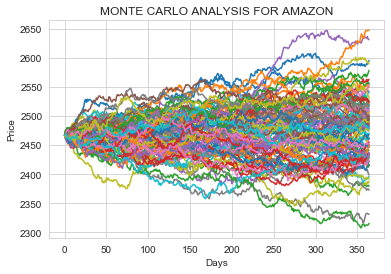

In [107]:
start_price = 2467.000000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MONTE CARLO ANALYSIS FOR AMAZON')

In [108]:
#creating histograms for these end results
runs=1000
simulation=np.zeros(runs)
#down below we are creating an array and storing all the ending price points we obtained in the above graph
for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]


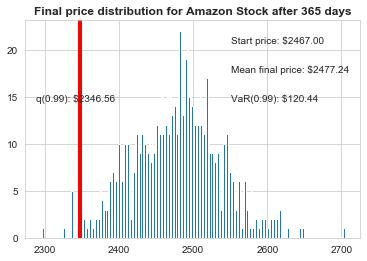

In [109]:
#99% of the values should fit within our output
q= np.percentile(simulation,1)

#plotting histograms
plt.hist(simulation,bins=200)

#adding text for starting price
plt.figtext(0.6,0.8 ,s="Start price: $%.2f" %start_price)

#adding text for mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

##adding text for variance of the prices(within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

##adding text for displaying 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#plotting a red line at the 1% quantile
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');

Conclusion: The start price was near 2467.00 and the mean final price is 2477.24. For the Value at Risk for the Amazon stock, which looks to be 120.44 for every investment of 2467.00 (the price of one inital Amazon stock). The amount of money that one would loose at 99 percent of times, according to the Monte Carlo method, would be around 120.44 .